Take Home Assignment 02: Liquid Level

1. Analyzing the liquid level of a vessel will be studied in this assignment
2. How to utilize background subtraction is demonstrated in the notebook
3. How to use subsequent thresholding and contour analysis is also demonstrated
4. The student's task is to implement the demonstrated techniques to obtain a liquid level plot for the entirety of the video

Notes:
It is advised to go over the opencv documentation for the following functions

cv2.threshold  :  https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html




Student has to deliver:
1. Plot of the liquid level.
2. A brief note on what the student understood by reading the section on Otsu's threholding method.
3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.
4. A brief description on the final algorithm developed by the student.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

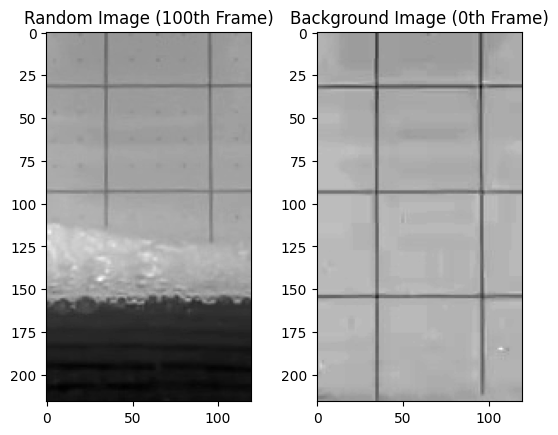

In [ ]:
# Importing Demo Images
img_r = cv2.imread('demo2_images/liquid_frame100.jpg', 0)
img_b = cv2.imread('demo2_images/liquid_frame000.jpg', 0)

# Display the images
plt.subplot(121), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(122), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()

Method 1 : Background Subtraction

Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Largest Contour Size: 6826.0
Total Area: 25920
Percentage: 26.3 %


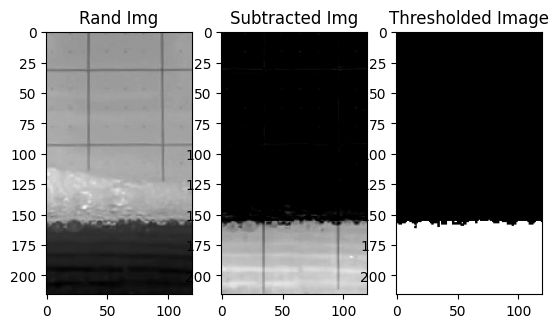

In [ ]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

How to read video files

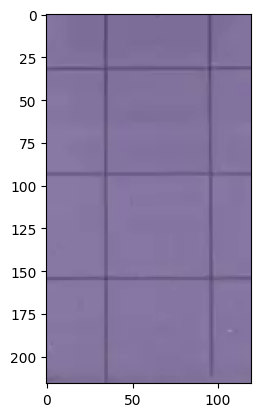

True

In [ ]:
# Reading frames from a video
cap = cv2.VideoCapture('demo2_images/liquidVideo.mp4')
ret, frame1 = cap.read()

# Displaying the first frame using plt
plt.imshow(frame1)
plt.show()



# **Answers**

1.

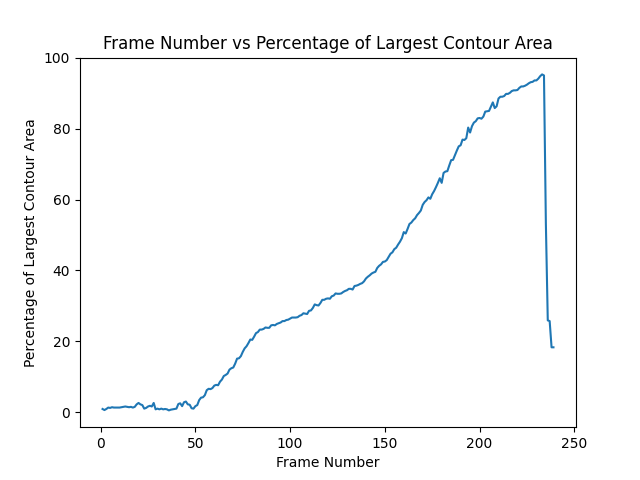

2. Otsu's thresholding is a method used to automatically find the best threshold value to separate an image into two parts, like the object and the background. It’s especially useful for images where the pixel brightness levels form two clear groups. Instead of we guess the threshold, Otsu's method looks at the image’s histogram and picks the value that best separates the two groups. It works by minimizing the differences within each group, making the separation as clear as possible. This method is handy because we don’t need to decide the threshold ourselves, it does it for us based on the image.

3.
Otsu's thresholding can encounter issues in specific scenarios when detecting liquid levels. One common error arises from **non-uniform illumination**, where reflections or bright spots near the liquid surface are misclassified as part of the liquid. This occurs because Otsu's method assumes a bimodal intensity distribution, which is disrupted by uneven lighting. These reflections can result in incorrect liquid level readings, especially when the surface of the liquid reflects light unevenly. Another error occurs with **transparent or low-contrast liquids**, such as water in a clear container. In such cases, the intensity difference between the liquid and the background is too small for Otsu's method to distinguish effectively. This can lead to missed detections of the liquid or the inclusion of noise in the segmentation. Both scenarios highlight the limitations of Otsu's method in real-world applications with challenging imaging conditions.


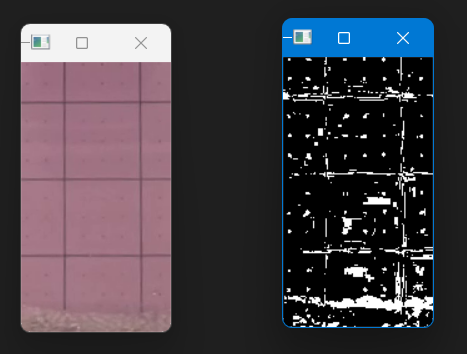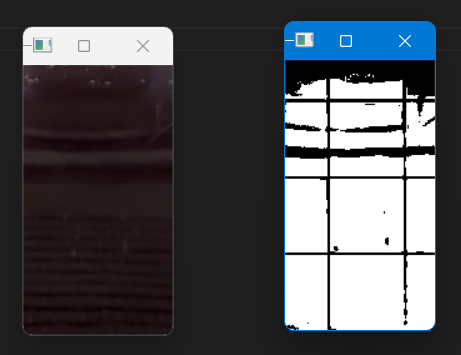



4. The developed algorithm processes a video to detect and measure motion, specifically liquid flow, by comparing each frame to a static background. It begins by capturing the first frame as the background and converting it to grayscale. For each subsequent frame, it calculates the difference between the current frame and the background to highlight moving regions. The difference is then converted into a binary image using Otsu's thresholding, making the motion regions stand out clearly. Contours are identified from this binary image, and the largest contour's area is calculated as a percentage of the total frame area. This percentage indicates the extent of motion or liquid coverage in the frame. The algorithm also displays the original frame and the processed binary image, providing a real-time view of the analysis. It runs continuously, updating each frame, and exits when the user presses 'q'. This straightforward approach effectively quantifies motion in video frames.

# **Code**

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#frame_no = 1
#frame_numbers = []
#percentages = []

# Path to the video file
video_path = 'liquidVideo.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Read the first frame as the background
ret, background = cap.read()
if not ret:
    print("Failed to read the video")
    cap.release()
    exit()

# Convert the background to grayscale
background_gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)

while True:
    # Read a new frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the current frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Subtracting the images
    img_sub = cv2.subtract(background_gray, frame_gray)

    # Thresholding the image, to obtain binary image
    ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Print the used threshold value
    print('Threshold Value:', ret)

    # Find contours in the image
    contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Sort the contours by size in descending order
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
    # Print the contour areas
    for i in range(len(contours)):
        print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

    # Find the area of the whole image
    rows, cols = img_sub_thresh.shape
    total_area = rows * cols
    print('Total Area:', total_area)

    # Calculate the percentage of the largest contour area, rounded to 1 decimal point
    percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
    print('Percentage:', percentage, '%')


    # Display the original frame and the thresholded difference
    cv2.imshow('Original Frame', frame)
    cv2.imshow('Background Subtraction', img_sub_thresh)

    #frame_numbers.append(frame_no)
    #frame_no += 1
    #percentages.append(percentage)

    # Exit if the user presses the 'q' key
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

#plt.plot(frame_numbers, percentages)
#plt.xlabel('Frame Number')
#plt.ylabel('Percentage of Largest Contour Area')
#plt.title('Frame Number vs Percentage of Largest Contour Area')
#plt.show()
